In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Importing All India causes dataset

In [48]:
df = pd.read_excel("2019 - All India by causes.xlsx", index_col='Sno')

In [3]:
#df.drop("Sno", axis=1, inplace=True)

In [49]:
df

,Cause,Male,Female,Transgender,Total,Perc_Share
Sno,,,,,,
1,Bankruptcy_Indebtedness,5381,527,0,5908,4.2
2,Marriage Related Issues,3382,4213,0,7595,5.5
3,Failure in Examination,1578,1166,0,2744,2.0
4,Impotency_Infertility,191,237,0,428,0.3
5,Family Problems,30110,15025,5,45140,32.4
6,Illness,16807,7016,7,23830,17.1
7,Death of Dear Person,791,395,0,1186,0.9
8,Drug Abuse_Alcoholic Addiction,7719,140,1,7860,5.6
9,Fall in Social Reputation,425,135,0,560,0.4


In [5]:
df.drop("Sno", axis=1, inplace=True)

## Function to draw a pareto chart

In [6]:
## Pareto chart code courtesy Tyler Marrs: https://tylermarrs.com/posts/pareto-plot-with-matplotlib/

def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(12,8))
    ax1.bar(x, y)
    ax1.set_xticklabels(xlabel, rotation=90)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='b')
    ax2.tick_params('y', colors='b')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='light')    
    
    if title:
        plt.title(title)
        
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.grid()
    plt.show()


## Draw pareto chart for All India Causes - Total

<ipython-input-6-990d026697ea>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabel, rotation=90)
<ipython-input-6-990d026697ea>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


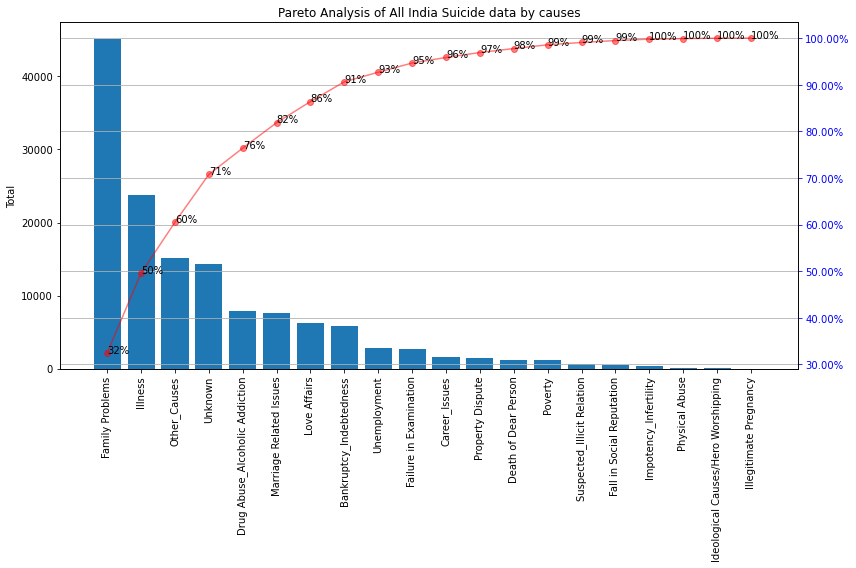

In [7]:
pareto_plot(df, x='Cause', y='Total', show_pct_y=True, title='Pareto Analysis of All India Suicide data by causes')

##  Draw pareto chart for All India Causes - Male

<ipython-input-6-990d026697ea>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabel, rotation=90)
<ipython-input-6-990d026697ea>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


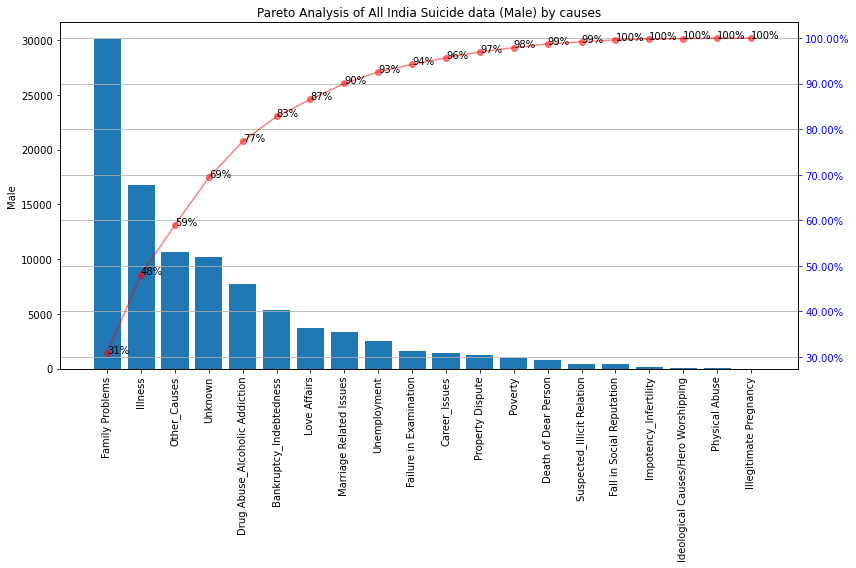

In [8]:
pareto_plot(df, x='Cause', y='Male', show_pct_y=True, title='Pareto Analysis of All India Suicide data (Male) by causes')

## Draw pareto chart for All India Causes - Female

<ipython-input-6-990d026697ea>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabel, rotation=90)
<ipython-input-6-990d026697ea>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


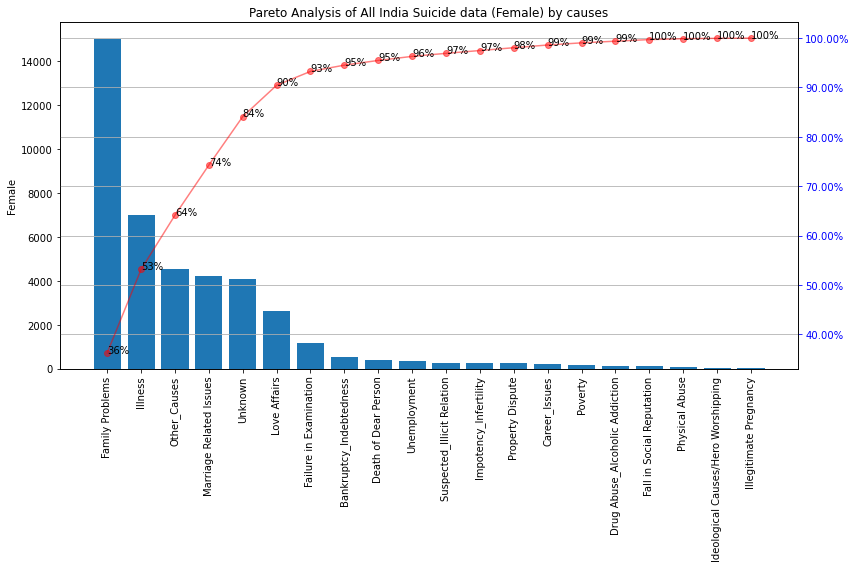

In [9]:
pareto_plot(df, x='Cause', y='Female', show_pct_y=True, title='Pareto Analysis of All India Suicide data (Female) by causes')

<b> Observations:</b> According to Pareto's principle (also known as the 80/20 rule), 20% of causes lead to 80% of consequences. Pareto Principle at a broad level is the idea that most things in life are not distributed evenly. I have used it extensively (in excel) when analyzing defects and causes in my projects. By fixing the root cause of 20% of defect categories identified through pareto analysis, we would be able to arrest 80% of defects. It has always brought the projects significant benefits by improving quality while spending less effort. 

Let us see how it works out in our National level suicide causes dataset. The objective here is to identify the causes that contribute to 80% of the suicide numbers. 

There are about 20 causes listed in the NCRB's document. I did the pareto visualization using python and matplotlib by following Tyler Marr's blog (https://tylermarrs.com/posts/pareto-plot-with-matplotlib/). 

Pareto plot: This plot has been drawn as a combination of two sub-plots:
- A bar plot of suicides by causes in descending order of suicides
- A line plot of cumulative percentages that those causes add up to
The way to read the plot would be to trace the 80% line from the right side y-axis until it meets the line plot. Then, drop down an imaginary line vertically on the x-axis from that point. The causes on and to the left of this imaginary line would be causes under consideration. In case these causes do not add up to 80%, an additional cause to the right could also be considered to add up to 80% or above.

The Top causes in male and female gender categories contributing to 80% of suicide numbers are:
- Male (6 causes): Family Problems, Illness, Other causes, Unknown, Drug Abuse/ Alcohol addiction, Bankruptcy/Debt
- Female (5 causes): Family Problems, Illness, Other causes, Marriage related issues and Unknown

We can see that 4 causes are the same across both the genders. However, couple of leading causes of male suicides not figuring in the top female suicide causes are Drug Abuse/Alcohol addiction and Bankruptcy/Debt. Similarly 'Marriage related issues' is present in Top causes of female suicide but does not figure in Male suicide top causes. 

## Suicide causes at state cluster level

In this section, we will analyse suicide rates by combining 2 datasets. 
1. Statewise by causes - which contains statewise causewise numbers and 
2. The states master data with literacy rate, TFR, GDP, etc and the clusters from Part 1 analysis

For this, I have grouped the states and union territories into the same 3 clusters that K-means provided. The clustering was discussed in Part 1 of this series. 

In [10]:
df_state = pd.read_excel("2019 - Statewise By causes.xlsx")

In [11]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 129 entries, State/UT to Female/Total suicide %
dtypes: float64(4), int64(124), object(1)
memory usage: 36.4+ KB


In [12]:
df_cause_master = df_state.copy() ## Taking a backup

In [13]:
Total_cols = ['State/UT']
for i in df_state.columns:
    if 'Total' in i:
        Total_cols.append(i)

In [14]:
Total_cols

['State/UT',
 'Debt_Total',
 'MarriageissueTotal-Male',
 'MarriageissueTotal--Female',
 'MarriageissueTotal--Trans- gender',
 'MarriageissueTotal--Total',
 'Marriag_nonsettlement_Total',
 'Marriage_Dowry_Total',
 'Marriage_Extramarital_Total',
 'Marriage_Divorce_Total',
 'Marriage_others_Total',
 'Examfailure_Total',
 'Infertility_Total',
 'Familyproblems_Total',
 'Illnesstotal_Total',
 'IllnessSTD_Total',
 'Illnesscancer_Total',
 'Illnessparalysis_Total',
 'Mentalillness_Total',
 'Otherillness_Total',
 'Deathofdearperson_Total',
 'Drugalcoholaddiction_Total',
 'Fallinsocialreputation_Total',
 'Idealogicalcauses_Total',
 'Loveaffairs_Total',
 'Poverty_Total',
 'Unemployment_Total',
 'Propertydispute_Total',
 'illicitrelation_Total',
 'Illegitimatepregnancy_Total',
 'Physicalabuse_Total',
 'Professionproblems_Total',
 'Unknowncauses_Total',
 'Othercauses_Total',
 'Total\nTransgender',
 'Total',
 'Female/Total suicide %']

## Creating sub-dataframes for different analysis

In [15]:
## The excel file contains 121 columns with big names. For every cause there is a Male field, a female field, 
## a transgender field and a total field. ## We will create the following sub-datasets from df_state.

## 1. df1_state: A dataframe with only the Totals for each main cause. This will not contain the sub-categories for main causes such
## as illness and marriage issues.
## 2. df2_state: A dataframe that contains male and female split but no totals. Again this will not contain sub-categories
## 3. df3_state: A dataframe containing sub-categories for marriage
## 4. df4_state: A dataframe containing sub-categories for illness

In [16]:
df1_state = df_state[Total_cols]
df1_state

,State/UT,Debt_Total,MarriageissueTotal-Male,MarriageissueTotal--Female,MarriageissueTotal--Trans- gender,MarriageissueTotal--Total,Marriag_nonsettlement_Total,Marriage_Dowry_Total,Marriage_Extramarital_Total,Marriage_Divorce_Total,...,Propertydispute_Total,illicitrelation_Total,Illegitimatepregnancy_Total,Physicalabuse_Total,Professionproblems_Total,Unknowncauses_Total,Othercauses_Total,Total\nTransgender,Total,Female/Total suicide %
0,ANDHRA PRADESH,828,73,78,0,151,39,16,23,37,...,40,29,0,0,42,404,618,0,6465,0.266821
1,ARUNACHAL PRADESH,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,59,47,0,112,0.276786
2,ASSAM,82,124,118,0,242,146,34,29,29,...,279,34,0,2,86,0,2,0,2370,0.291561
3,BIHAR,6,44,67,0,111,64,27,14,6,...,5,2,0,1,20,0,3,0,641,0.383775
4,CHHATTISGARH,5,228,152,0,380,62,51,26,7,...,13,23,0,0,19,2029,1798,0,7629,0.276445
5,GOA,2,0,4,0,4,1,1,2,0,...,1,2,0,0,8,13,14,0,259,0.223938
6,GUJARAT,81,179,117,0,296,82,28,22,84,...,39,12,0,5,120,1733,309,1,7655,0.324755
7,HARYANA,4,239,78,0,317,60,6,20,3,...,22,0,0,0,63,587,1644,0,4191,0.213314
8,HIMACHAL PRADESH,3,37,44,0,81,44,21,16,0,...,15,4,0,0,26,7,2,0,584,0.354452
9,JAMMU & KASHMIR,0,4,9,0,13,8,0,0,2,...,12,0,0,0,1,94,32,0,284,0.447183


In [17]:
## Dropping all sub-categories within 'Marriage issue' and 'Illness' categories. These are the only two categories that have sub-categories.

sub_causes = ['MarriageissueTotal-Male', 'MarriageissueTotal--Female', 'MarriageissueTotal--Trans- gender', 'Marriag_nonsettlement_Total', 'Marriage_Dowry_Total', 'Marriage_Extramarital_Total', 'Marriage_Divorce_Total', 'Marriage_others_Total','IllnessSTD_Total', 'Illnesscancer_Total', 'Illnessparalysis_Total', 'Mentalillness_Total', 'Otherillness_Total']

In [18]:
df1_state.drop(labels = sub_causes, axis=1, inplace=True)

C:\Users\91984\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df1_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State/UT                      36 non-null     object 
 1   Debt_Total                    36 non-null     int64  
 2   MarriageissueTotal--Total     36 non-null     int64  
 3   Examfailure_Total             36 non-null     int64  
 4   Infertility_Total             36 non-null     int64  
 5   Familyproblems_Total          36 non-null     int64  
 6   Illnesstotal_Total            36 non-null     int64  
 7   Deathofdearperson_Total       36 non-null     int64  
 8   Drugalcoholaddiction_Total    36 non-null     int64  
 9   Fallinsocialreputation_Total  36 non-null     int64  
 10  Idealogicalcauses_Total       36 non-null     int64  
 11  Loveaffairs_Total             36 non-null     int64  
 12  Poverty_Total                 36 non-null     int64  
 13  Unemplo

In [20]:
cols = df1_state.columns

In [21]:
## Truncating "_Total" in column field
trun_col = []
replace_cols = []

for i in cols:
    new_col = i.replace("Total--Total", "_Total")
    trun_col.append(new_col)        
    
for i in trun_col:
    new_col = i.replace("_Total", "")
    replace_cols.append(new_col)        

In [22]:
## Replace original columns with truncated columns
df1_state.columns = replace_cols

In [23]:
df1_state.shape

(36, 24)

In [24]:
replace_cols

['State/UT',
 'Debt',
 'Marriageissue',
 'Examfailure',
 'Infertility',
 'Familyproblems',
 'Illnesstotal',
 'Deathofdearperson',
 'Drugalcoholaddiction',
 'Fallinsocialreputation',
 'Idealogicalcauses',
 'Loveaffairs',
 'Poverty',
 'Unemployment',
 'Propertydispute',
 'illicitrelation',
 'Illegitimatepregnancy',
 'Physicalabuse',
 'Professionproblems',
 'Unknowncauses',
 'Othercauses',
 'Total\nTransgender',
 'Total',
 'Female/Total suicide %']

In [25]:
df1_state.set_index(keys='State/UT', drop=True, inplace=False)

,Debt,Marriageissue,Examfailure,Infertility,Familyproblems,Illnesstotal,Deathofdearperson,Drugalcoholaddiction,Fallinsocialreputation,Idealogicalcauses,...,Propertydispute,illicitrelation,Illegitimatepregnancy,Physicalabuse,Professionproblems,Unknowncauses,Othercauses,Total\nTransgender,Total,Female/Total suicide %
State/UT,,,,,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,828,151,93,30,1706,1845,67,302,7,0,...,40,29,0,0,42,404,618,0,6465,0.266821
ARUNACHAL PRADESH,0,1,1,0,1,1,0,0,1,0,...,0,0,0,0,1,59,47,0,112,0.276786
ASSAM,82,242,104,3,615,157,2,92,49,1,...,279,34,0,2,86,0,2,0,2370,0.291561
BIHAR,6,111,95,11,234,23,1,14,1,0,...,5,2,0,1,20,0,3,0,641,0.383775
CHHATTISGARH,5,380,80,11,1456,1143,45,291,13,0,...,13,23,0,0,19,2029,1798,0,7629,0.276445
GOA,2,4,0,0,67,72,4,23,0,0,...,1,2,0,0,8,13,14,0,259,0.223938
GUJARAT,81,296,180,32,2139,1634,114,75,33,33,...,39,12,0,5,120,1733,309,1,7655,0.324755
HARYANA,4,317,19,2,649,753,2,87,5,1,...,22,0,0,0,63,587,1644,0,4191,0.213314
HIMACHAL PRADESH,3,81,19,0,203,88,4,21,3,1,...,15,4,0,0,26,7,2,0,584,0.354452


In [26]:
## create new dataframe as backup
df_state_reasons = df1_state.T.copy()

In [27]:
df_state_reasons.columns = df_state_reasons.loc['State/UT']

In [28]:
df_state_reasons.drop(['State/UT'], axis=0, inplace=True)

In [29]:
df_append = pd.read_excel("masterdata_with_clusternumbers.xlsx", index_col='State_UT')

In [30]:
df_append

,Suicide_Rate,Total_lit_rate,Average_2019_Unemployment,QoW_sedatives,QoW_Opioids,Ganja,Alcohol_total_perc,Percapita_NSDP_2019,TFR_2017,Perc_BPL,Mean_Asset_Score_2016,Gini_Coefficient_2016,Cluster_kmeans2,Cluster_kmeans3,Cluster_kmeans4,Total_Suicides,Pop_in_lakhs
State_UT,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,12.4,67.0,4.641667,0.31,0.8,0.2,26.5,113927.263123,1.6,9.2,0.3570,0.2700,0,2,2,6465,523.2
ARUNACHAL PRADESH,7.4,65.4,6.416667,1.02,5.7,4.2,40.4,105064.063534,2.1,34.7,0.3310,0.3060,0,1,1,112,15.1
ASSAM,6.9,72.2,5.025000,0.15,0.9,0.5,15.2,62795.613255,2.3,32.0,0.3130,0.2890,0,1,1,2370,344.2
BIHAR,0.5,61.8,11.425000,0.01,0.1,1.1,1.7,31286.615814,3.2,33.7,0.2270,0.4010,0,1,1,641,1201.1
CHHATTISGARH,26.4,70.3,6.400000,0.27,0.6,2.7,57.2,75277.729630,2.4,39.9,0.3120,0.3420,1,0,0,7629,288.5
GOA,16.8,88.7,9.350000,0.25,1.5,0.7,46.0,367226.470352,1.8,5.1,0.5760,0.1800,0,2,2,259,15.4
GUJARAT,11.2,78.0,4.841667,0.23,0.4,0.1,7.2,165358.840640,2.2,16.6,0.4100,0.2690,0,2,2,7655,682.5
HARYANA,14.5,75.6,22.033333,0.52,2.5,2.9,41.3,176199.105299,2.2,11.2,0.5160,0.2000,0,2,2,4191,288.1
HIMACHAL PRADESH,8.0,82.8,17.316667,0.39,1.7,3.2,17.6,142155.416182,1.6,8.1,0.4910,0.2000,0,1,1,584,73.2


In [31]:
df_state_reasons.T.to_excel("state_reasons_for_tableau.xlsx")

In [32]:
df_state_reasons_master = pd.concat([df_state_reasons.T, df_append], axis=1)

In [33]:
df_state_reasons_master

,Debt,Marriageissue,Examfailure,Infertility,Familyproblems,Illnesstotal,Deathofdearperson,Drugalcoholaddiction,Fallinsocialreputation,Idealogicalcauses,...,Percapita_NSDP_2019,TFR_2017,Perc_BPL,Mean_Asset_Score_2016,Gini_Coefficient_2016,Cluster_kmeans2,Cluster_kmeans3,Cluster_kmeans4,Total_Suicides,Pop_in_lakhs
ANDHRA PRADESH,828,151,93,30,1706,1845,67,302,7,0,...,113927.263123,1.6,9.2,0.3570,0.2700,0,2,2,6465,523.2
ARUNACHAL PRADESH,0,1,1,0,1,1,0,0,1,0,...,105064.063534,2.1,34.7,0.3310,0.3060,0,1,1,112,15.1
ASSAM,82,242,104,3,615,157,2,92,49,1,...,62795.613255,2.3,32.0,0.3130,0.2890,0,1,1,2370,344.2
BIHAR,6,111,95,11,234,23,1,14,1,0,...,31286.615814,3.2,33.7,0.2270,0.4010,0,1,1,641,1201.1
CHHATTISGARH,5,380,80,11,1456,1143,45,291,13,0,...,75277.729630,2.4,39.9,0.3120,0.3420,1,0,0,7629,288.5
GOA,2,4,0,0,67,72,4,23,0,0,...,367226.470352,1.8,5.1,0.5760,0.1800,0,2,2,259,15.4
GUJARAT,81,296,180,32,2139,1634,114,75,33,33,...,165358.840640,2.2,16.6,0.4100,0.2690,0,2,2,7655,682.5
HARYANA,4,317,19,2,649,753,2,87,5,1,...,176199.105299,2.2,11.2,0.5160,0.2000,0,2,2,4191,288.1
HIMACHAL PRADESH,3,81,19,0,203,88,4,21,3,1,...,142155.416182,1.6,8.1,0.4910,0.2000,0,1,1,584,73.2
JAMMU & KASHMIR,0,13,13,0,37,16,0,2,1,0,...,70176.433858,1.6,10.4,0.4440,0.2560,0,1,1,284,135.3


In [34]:
df1_state.columns

Index(['State/UT', 'Debt', 'Marriageissue', 'Examfailure', 'Infertility',
       'Familyproblems', 'Illnesstotal', 'Deathofdearperson',
       'Drugalcoholaddiction', 'Fallinsocialreputation', 'Idealogicalcauses',
       'Loveaffairs', 'Poverty', 'Unemployment', 'Propertydispute',
       'illicitrelation', 'Illegitimatepregnancy', 'Physicalabuse',
       'Professionproblems', 'Unknowncauses', 'Othercauses',
       'Total\nTransgender', 'Total', 'Female/Total suicide %'],
      dtype='object')

In [35]:
causes_cols=[]
causes_cols = df1_state.columns

In [36]:
causes_cols

Index(['State/UT', 'Debt', 'Marriageissue', 'Examfailure', 'Infertility',
       'Familyproblems', 'Illnesstotal', 'Deathofdearperson',
       'Drugalcoholaddiction', 'Fallinsocialreputation', 'Idealogicalcauses',
       'Loveaffairs', 'Poverty', 'Unemployment', 'Propertydispute',
       'illicitrelation', 'Illegitimatepregnancy', 'Physicalabuse',
       'Professionproblems', 'Unknowncauses', 'Othercauses',
       'Total\nTransgender', 'Total', 'Female/Total suicide %'],
      dtype='object')

In [37]:
causes_cols = replace_cols
causes_cols.remove('State/UT')
causes_cols.append('Total_Suicides')

In [38]:
### Changing absolute value of suicide numbers under each cause into ratio of suicide numbers/ population in lakhs to 
## get suicide rates for each cause. This is done so that comparison across states will make sense.

In [39]:
for i in causes_cols:
    df_state_reasons_master[i] = df_state_reasons_master[i]/ df_state_reasons_master['Pop_in_lakhs']

In [40]:
df_state_reasons_master.columns

Index(['Debt', 'Marriageissue', 'Examfailure', 'Infertility', 'Familyproblems',
       'Illnesstotal', 'Deathofdearperson', 'Drugalcoholaddiction',
       'Fallinsocialreputation', 'Idealogicalcauses', 'Loveaffairs', 'Poverty',
       'Unemployment', 'Propertydispute', 'illicitrelation',
       'Illegitimatepregnancy', 'Physicalabuse', 'Professionproblems',
       'Unknowncauses', 'Othercauses', 'Total\nTransgender', 'Total',
       'Female/Total suicide %', 'Suicide_Rate', 'Total_lit_rate',
       'Average_2019_Unemployment', 'QoW_sedatives', 'QoW_Opioids', 'Ganja',
       'Alcohol_total_perc', 'Percapita_NSDP_2019', 'TFR_2017', 'Perc_BPL',
       'Mean_Asset_Score_2016', 'Gini_Coefficient_2016', 'Cluster_kmeans2',
       'Cluster_kmeans3', 'Cluster_kmeans4', 'Total_Suicides', 'Pop_in_lakhs'],
      dtype='object')

In [41]:
## to be deleted
##df_state_reasons_master['Suicide_Rate'] =  df_state_reasons_master['Total_Suicides']/df_state_reasons_master['Pop_in_lakhs']

In [42]:
df_state_reasons_master

,Debt,Marriageissue,Examfailure,Infertility,Familyproblems,Illnesstotal,Deathofdearperson,Drugalcoholaddiction,Fallinsocialreputation,Idealogicalcauses,...,Percapita_NSDP_2019,TFR_2017,Perc_BPL,Mean_Asset_Score_2016,Gini_Coefficient_2016,Cluster_kmeans2,Cluster_kmeans3,Cluster_kmeans4,Total_Suicides,Pop_in_lakhs
ANDHRA PRADESH,1.58257,0.288609,0.177752,0.0573394,3.2607,3.52638,0.128058,0.577217,0.0133792,0,...,113927.263123,1.6,9.2,0.3570,0.2700,0,2,2,12.356651,523.2
ARUNACHAL PRADESH,0,0.0662252,0.0662252,0,0.0662252,0.0662252,0,0,0.0662252,0,...,105064.063534,2.1,34.7,0.3310,0.3060,0,1,1,7.417219,15.1
ASSAM,0.238234,0.70308,0.30215,0.00871586,1.78675,0.45613,0.00581058,0.267286,0.142359,0.00290529,...,62795.613255,2.3,32.0,0.3130,0.2890,0,1,1,6.885532,344.2
BIHAR,0.00499542,0.0924153,0.0790942,0.00915827,0.194821,0.0191491,0.00083257,0.011656,0.00083257,0,...,31286.615814,3.2,33.7,0.2270,0.4010,0,1,1,0.533677,1201.1
CHHATTISGARH,0.017331,1.31716,0.277296,0.0381282,5.04679,3.96187,0.155979,1.00867,0.0450607,0,...,75277.729630,2.4,39.9,0.3120,0.3420,1,0,0,26.443674,288.5
GOA,0.12987,0.25974,0,0,4.35065,4.67532,0.25974,1.49351,0,0,...,367226.470352,1.8,5.1,0.5760,0.1800,0,2,2,16.818182,15.4
GUJARAT,0.118681,0.4337,0.263736,0.0468864,3.13407,2.39414,0.167033,0.10989,0.0483516,0.0483516,...,165358.840640,2.2,16.6,0.4100,0.2690,0,2,2,11.216117,682.5
HARYANA,0.0138841,1.10031,0.0659493,0.00694203,2.25269,2.61368,0.00694203,0.301978,0.0173551,0.00347102,...,176199.105299,2.2,11.2,0.5160,0.2000,0,2,2,14.547032,288.1
HIMACHAL PRADESH,0.0409836,1.10656,0.259563,0,2.77322,1.20219,0.0546448,0.286885,0.0409836,0.0136612,...,142155.416182,1.6,8.1,0.4910,0.2000,0,1,1,7.978142,73.2
JAMMU & KASHMIR,0,0.0960828,0.0960828,0,0.273466,0.118256,0,0.014782,0.00739098,0,...,70176.433858,1.6,10.4,0.4440,0.2560,0,1,1,2.099039,135.3


In [43]:
df_state_reasons_master.to_excel("state_reasons_for_tableau.xlsx")

In [44]:
df_state

,State/UT,Debt_Male,Debt_Female,Debt_Transgender,Debt_Total,MarriageissueTotal-Male,MarriageissueTotal--Female,MarriageissueTotal--Trans- gender,MarriageissueTotal--Total,Marriag_nonsettlement_Male,...,Othercauses_Trans- gender,Othercauses_Total,Male,Female,Total\nTransgender,Total,Pop_in_lakhs,Male Suicide rate,Female Suicide rate,Female/Total suicide %
0,ANDHRA PRADESH,773,55,0,828,73,78,0,151,19,...,0,618,4740,1725,0,6465,523.2,9.059633,3.297018,0.266821
1,ARUNACHAL PRADESH,0,0,0,0,0,1,0,1,0,...,0,47,81,31,0,112,15.1,5.364238,2.052980,0.276786
2,ASSAM,63,19,0,82,124,118,0,242,80,...,0,2,1679,691,0,2370,344.2,4.877978,2.007554,0.291561
3,BIHAR,4,2,0,6,44,67,0,111,35,...,0,3,395,246,0,641,1201.1,0.328865,0.204812,0.383775
4,CHHATTISGARH,5,0,0,5,228,152,0,380,38,...,0,1798,5520,2109,0,7629,288.5,19.133449,7.310225,0.276445
5,GOA,2,0,0,2,0,4,0,4,0,...,0,14,201,58,0,259,15.4,13.051948,3.766234,0.223938
6,GUJARAT,78,3,0,81,179,117,0,296,44,...,0,309,5168,2486,1,7655,682.5,7.572161,3.642491,0.324755
7,HARYANA,4,0,0,4,239,78,0,317,43,...,0,1644,3297,894,0,4191,288.1,11.443943,3.103089,0.213314
8,HIMACHAL PRADESH,2,1,0,3,37,44,0,81,24,...,0,2,377,207,0,584,73.2,5.150273,2.827869,0.354452
9,JAMMU & KASHMIR,0,0,0,0,4,9,0,13,4,...,0,32,157,127,0,284,135.3,1.160384,0.938655,0.447183
